In [2]:
from pandas import read_csv, DataFrame
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np
import scipy.stats as stats

#colnames=['Number', 'Time', 'Temperature', 'Uvx', 'Uvy', 'Uvz', 'Uex', 'Uey', 'Uez']
dataset = read_csv('res.csv', sep=',') #names=colnames, header=None)

dataset.head()

,Number,Time,Temperature,Uvx,Uvy,Uvz,Uex,Uey,Uez,Collision,Gas
0,1,175,303.696396,-4.658513,-5.898589,-3.567033,2.745380,-1.853520,4.392539,0,0
1,2,182,307.713569,-0.799739,-0.019740,-3.964088,0.730010,-4.444037,2.841238,0,0
2,3,195,312.573645,-1.971708,3.424431,-3.939806,1.070360,-2.532539,2.700840,0,0
3,4,26,309.180417,2.485977,-0.693671,-6.412166,1.574913,0.404154,4.182970,0,0
4,5,240,299.588882,-0.079111,-6.650128,-3.855634,1.709926,-0.126030,6.029875,0,0


In [3]:
#find absolute value of z-score for each observation
z = np.abs(stats.zscore(dataset))

#only keep rows in dataframe with all z-scores less than absolute value of 3 
data_clean = dataset[(z<3).all(axis=1)]

#find how many rows are left in the dataframe 
dataset = data_clean
data_clean.shape

(372413, 11)

In [4]:
Q1 = dataset.quantile(q=0.25)
Q3 = dataset.quantile(q=0.75)
IQR = dataset.apply(stats.iqr)

# Оставляем только строки в DataFrame, значения которых находятся в пределах 1.5*IQR от Q1 и Q3
data_clean = dataset[~((dataset < (Q1 - 1.5 * IQR)) | (dataset > (Q3 + 1.5 * IQR))).any(axis=1)]

# Находим количество оставшихся строк в DataFrame
data_clean.shape

(264518, 11)

In [96]:
data_clean.to_csv('data_clean.csv', index=False)

In [114]:
data_clean.describe()

,Number,Time,Temperature,Uvx,Uvy,Uvz,Uex,Uey,Uez,Collision,Gas
count,264518.000000,264518.000000,264518.000000,264518.000000,264518.000000,264518.000000,264518.000000,264518.000000,264518.000000,264518.000000,264518.000000
mean,50085.142898,125.308402,300.037890,0.015961,0.018715,-5.595860,0.009394,0.007820,5.588314,0.514150,0.406744
std,28866.519438,99.101756,9.111471,3.911661,3.907863,4.036903,3.906254,3.911062,4.047935,0.499801,0.491227
min,1.000000,9.000000,274.830314,-10.641850,-10.616862,-18.283829,-10.637627,-10.622561,0.000213,0.000000,0.000000
25%,25074.000000,41.000000,293.739897,-2.330173,-2.325106,-7.701878,-2.329712,-2.347392,2.571891,0.000000,0.000000
50%,50153.500000,101.000000,299.964825,0.007544,0.020690,-4.322550,0.001939,0.000870,4.311346,1.000000,0.000000
75%,75155.000000,171.000000,306.266853,2.352821,2.363421,-2.587855,2.355024,2.350308,7.710405,1.000000,1.000000
max,99999.000000,437.000000,325.155913,10.667716,10.648791,-0.007954,10.643975,10.641741,18.339096,1.000000,1.000000


In [5]:
dataset.corr()

,Number,Time,Temperature,Uvx,Uvy,Uvz,Uex,Uey,Uez
Number,1.000000,-0.004283,0.001134,-0.003806,-0.001069,-0.001097,0.000485,0.001347,-0.003931
Time,-0.004283,1.000000,-0.006679,0.000914,-0.001343,0.147005,0.000468,0.001124,-0.149089
Temperature,0.001134,-0.006679,1.000000,-0.000391,-0.005849,0.000349,0.003691,-0.002598,-0.003538
Uvx,-0.003806,0.000914,-0.000391,1.000000,0.003032,0.005799,0.305235,-0.006787,-0.000514
Uvy,-0.001069,-0.001343,-0.005849,0.003032,1.000000,0.000570,-0.003143,0.310942,-0.001374
Uvz,-0.001097,0.147005,0.000349,0.005799,0.000570,1.000000,0.000325,-0.004770,-0.141900
Uex,0.000485,0.000468,0.003691,0.305235,-0.003143,0.000325,1.000000,-0.000989,-0.000380
Uey,0.001347,0.001124,-0.002598,-0.006787,0.310942,-0.004770,-0.000989,1.000000,-0.002100
Uez,-0.003931,-0.149089,-0.003538,-0.000514,-0.001374,-0.141900,-0.000380,-0.002100,1.000000


In [209]:
dataset = dataset.query('Time < 1001')
dataset = dataset.query('Temperature < 401')

In [115]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 372413 entries, 0 to 399995
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Number       372413 non-null  int64  
 1   Time         372413 non-null  int64  
 2   Temperature  372413 non-null  float64
 3   Uvx          372413 non-null  float64
 4   Uvy          372413 non-null  float64
 5   Uvz          372413 non-null  float64
 6   Uex          372413 non-null  float64
 7   Uey          372413 non-null  float64
 8   Uez          372413 non-null  float64
 9   Collision    372413 non-null  int64  
 10  Gas          372413 non-null  int64  
dtypes: float64(7), int64(4)
memory usage: 34.1 MB


In [5]:
trg = data_clean.drop(['Number', 'Time'], axis=1)[['Uex','Uey', 'Uez']]
trn = data_clean.drop(['Number', 'Uex','Uey', 'Uez'], axis=1)

In [6]:
Xtrn, Xtest, Ytrn, Ytest = train_test_split(trn, trg, test_size=0.3)

In [84]:
Xtest

,Time,Temperature,Uvx,Uvy,Uvz
23595,376,293.756408,-1.077858,-4.100347,-2.317217
54176,134,292.042688,-0.669664,-1.321128,-5.942976
82369,32,283.409417,-1.261288,2.240486,-2.642635
73027,84,306.349795,-0.302678,-1.590172,-1.530045
53888,46,294.119707,-0.720733,-3.965174,-0.265925
...,...,...,...,...,...
83676,82,285.857245,2.222786,0.734139,-2.937676
66710,30,307.613611,2.718507,-1.039213,-2.396189
46913,107,292.294441,1.119810,-0.253573,-1.185022
48507,31,302.451028,-4.388996,-1.014578,-3.965820


In [35]:
model = RandomForestRegressor(n_estimators=200, max_depth=10, verbose=2, n_jobs=8)
# model = GradientBoosting(verbose=2, n_jobs=8)
# model = RandomForestRegressor(n_estimators=200, verbose=2, n_jobs=8, max_depth=10, min_samples_split=2, min_impurity_decrease=3)
#{'criterion': 'squared_error', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 200}

In [36]:
%%time
model.fit(Xtrn, Ytrn)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 200building tree 2 of 200

building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200


[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:   10.2s


building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200
building tree 62 of 200
building tree 63 of 200
building tree 64 of 200
building tree 65 of 200
building tree 66 of 200
building tree 67 of 200
building tree 68 of 200
building tree 69 of 200
building tree 70 of 200
building tree 71 of 200
building tree 72 of 200
building tree 73 of 200
building tree 74 of 200
building tree 75 of 200
building tree 76 of 200
building tree 77

[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   49.3s


building tree 156 of 200
building tree 157 of 200
building tree 158 of 200
building tree 159 of 200
building tree 160 of 200
building tree 161 of 200
building tree 162 of 200
building tree 163 of 200
building tree 164 of 200
building tree 165 of 200
building tree 166 of 200
building tree 167 of 200
building tree 168 of 200
building tree 169 of 200
building tree 170 of 200
building tree 171 of 200
building tree 172 of 200
building tree 173 of 200
building tree 174 of 200
building tree 175 of 200
building tree 176 of 200
building tree 177 of 200
building tree 178 of 200
building tree 179 of 200
building tree 180 of 200
building tree 181 of 200
building tree 182 of 200
building tree 183 of 200
building tree 184 of 200
building tree 185 of 200
building tree 186 of 200
building tree 187 of 200
building tree 188 of 200
building tree 189 of 200
building tree 190 of 200
building tree 191 of 200
building tree 192 of 200
building tree 193 of 200
building tree 194 of 200
building tree 195 of 200


[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:  1.2min finished


RandomForestRegressor(max_depth=10, n_estimators=200, n_jobs=8, verbose=2)

In [9]:
from joblib import dump, load
dump(model, 'itog.joblib')

['itog.joblib']

In [ ]:
# model = load('model.joblib')

In [18]:
Xtest

,Time,Temperature,Uvx,Uvy,Uvz
69996,94,287.816504,-2.632211,-0.180609,-0.644479
69997,593,302.933330,-3.750156,-1.251249,-0.383107
69998,22,288.774862,-2.595163,-1.214030,-3.453837
69999,43,289.994031,1.136208,-2.898475,-2.304839
70000,114,308.147086,-0.084551,-1.146960,-5.487979
...,...,...,...,...,...
99994,687,303.108127,0.874091,-2.620835,-2.138626
99995,95,307.992792,-1.542888,0.848588,-5.653005
99996,604,307.992792,2.914242,-1.050735,-3.063296
99997,1112,298.241611,3.262599,2.136047,-4.333847


In [32]:
test_prediction = model.predict(Xtest)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.5s finished


In [79]:
test_prediction

array([[ 0.7270165 ,  0.36612362,  2.6266311 ],
       [-3.82089821,  0.19590864,  4.05407645],
       [ 0.0220837 ,  0.06560965,  2.77173775],
       ...,
       [ 1.50797867, -0.82266826,  4.92540855],
       [-0.07964781,  0.1633072 ,  2.74698578],
       [-0.00520561,  0.08337911,  2.75193799]])

In [33]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
import numpy as np
MAE = mean_absolute_error(Ytest, test_prediction)
MSE = mean_squared_error(Ytest, test_prediction)
RMSE = np.sqrt(MSE)
r2 = r2_score(Ytest, test_prediction)
for key, value in {'MAE': MAE, 'MSE': MSE, 'RMSE': RMSE, 'r2': r2}.items():
    print(key, value)

MAE 1.4590120150602541
MSE 4.438430940760053
RMSE 2.1067583963900685
r2 0.7120202575594549


In [20]:
dictionary = dict(zip(['Time', 'Temperature', 'Uvx', 'Uvy', 'Uvz', 'Collision', 'Gas'], [[175],[303.696395975584],[-4.65851294521058],[-5.89858912205267],[-3.56703257911055],[0], [0]])) 

# 1 175 303.696395975584 -4.65851294521058 -5.89858912205267 -3.56703257911055 2.74537969604819 -1.85351971789969 4.39253856575895
# 72684 221 306.602445023578 0.718161050587478 -1.13182246685776 -2.12674293208305 1.10781565600769 1.99713134032302 2.64555549117115
# 42506 50 301.347507320898 -1.41671510971763 -2.14174811027822 -1.11212950724402 0.734497724115191 -1.47629909445715 4.79132930824164
# 11992 1056 309.182999268812 -1.22712245755122 -3.67291269437087 -1.43325401403072 -3.23504710752761 4.85529234257236 2.89969362393692
# 93185 2068 307.574859478378 -2.18740234743032 -3.13065303296741 -1.38760829911377 2.19455825716011 1.30812834219089 5.73225918174957

print(dictionary)

array = DataFrame(dictionary)
array

{'Time': [175], 'Temperature': [303.696395975584], 'Uvx': [-4.65851294521058], 'Uvy': [-5.89858912205267], 'Uvz': [-3.56703257911055], 'Collision': [0], 'Gas': [0]}


,Time,Temperature,Uvx,Uvy,Uvz,Collision,Gas
0,175,303.696396,-4.658513,-5.898589,-3.567033,0,0


In [30]:
%%time
model.predict(array)

CPU times: total: 15.6 ms
Wall time: 51.4 ms


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished


array([[-0.12702364, -0.12594717,  2.84534954]])

In [91]:
model.predict(array.loc[0:0])

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished


array([[-8.54877382e-02, -1.20299898e-03,  2.81040592e+00]])

In [143]:
data_clean[(data_clean["Number"] == 56763)].drop(['Number', 'Uex', 'Uey', 'Uez'], axis=1)

# 56797,90,292.393120335172,-7.39232046870231,10.9036830085417,-12.034277021692,-6.72895320886501,11.0543869966051,10.4764564124139,1,1

,Time,Temperature,Uvx,Uvy,Uvz,Collision,Gas
56762,18,290.436140,3.655995,2.963391,-6.489717,0,0
156761,153,287.553658,2.356882,0.433350,-2.922449,1,0
256760,110,310.395989,-6.815031,-1.108184,-14.016250,0,1
356759,83,300.235118,1.117821,-1.208441,-13.516352,1,1


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished


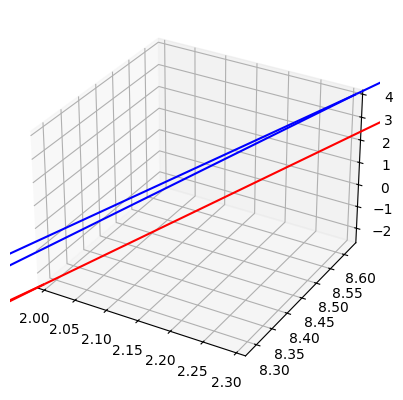

In [144]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Ваши вектора
vector1 = [1.995869, 8.273254, -2.536799]
vector2 = model.predict(data_clean[(data_clean["Gas"] == 1) & (data_clean["Collision"] == 1) & (data_clean["Number"] == 56795)].drop(['Number', 'Uex', 'Uey', 'Uez'], axis=1))

# vector1 = 

#73094 161 298.536286107172 -1.86539822895878 -0.376889417204399 -1.34902931363484 -1.7194351673746 1.35050062417451 0.319871675521762

# Создание нового рисунка
fig = plt.figure()

# Добавление 3D-осей
ax = fig.add_subplot(111, projection='3d')

# Построение векторов
ax.quiver(0, 0, 0, vector1[0], vector1[1], vector1[2], color='r')
ax.quiver(0, 0, 0, vector2[0][0], vector2[0][1], vector2[0][2], color='b')

# Установка пределов для осей
ax.set_xlim([min(vector1[0], vector2[0][0]), max(vector1[0], vector2[0][0])])
ax.set_ylim([min(vector1[1], vector2[0][1]), max(vector1[1], vector2[0][1])])
ax.set_zlim([min(vector1[2], vector2[0][2]), max(vector1[2], vector2[0][2])])

# Показать график
plt.show()


In [64]:
vector2[0][0]

1.6831671344359886

In [70]:
random_sample = dataset.sample(n=100)

random_sample

,Number,Time,Temperature,Uvx,Uvy,Uvz,Uex,Uey,Uez
9910,9911,216,295.505936,1.329027,-0.617004,-0.190050,3.007517,4.237555,4.565514
90976,90977,283,287.922436,-1.659509,2.954410,-2.150323,-1.661191,-1.072361,2.452245
24514,24515,98,301.698101,3.379821,-1.990590,-2.127158,-1.743085,-1.296273,3.765461
49906,49907,114,306.691388,2.032692,3.158747,-3.165354,-2.740162,0.587914,1.406277
89529,89530,173,296.332565,2.984763,0.437833,-4.618180,-1.369479,3.860301,3.630680
...,...,...,...,...,...,...,...,...,...
26626,26627,1059,289.222364,2.295026,-1.008805,-0.668495,-3.136997,-0.362833,0.655998
7961,7962,24,300.259739,-4.519546,-3.020463,-4.179093,-4.957008,-2.546449,3.105743
99882,99883,651,310.339834,2.426642,-0.483972,-1.406603,-0.011330,3.605280,1.878738
81586,81587,133,297.009186,5.289057,0.596214,-5.267032,3.028089,3.813539,2.142015


In [ ]:
model.predict(random_sample.)